# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [16]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

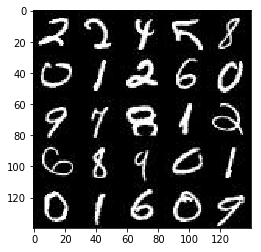

In [17]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

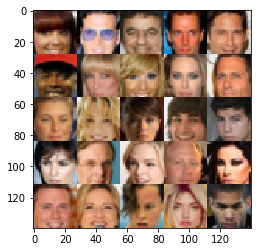

In [18]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [29]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, None, name='learning_rate')
    return input_real, input_z, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [30]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha=0.1
    
    #batch,reluc
    with tf.variable_scope('discriminator', reuse=reuse):
        
        layer1 = tf.layers.conv2d(images, 32, 5, 2, padding='SAME', kernel_initializer=tf.random_normal_initializer(stddev=0.02))
        layer1 = tf.maximum(alpha * layer1, layer1)
        
        
        layer2 = tf.layers.conv2d(layer1, 64, 5, 2, padding='SAME', kernel_initializer=tf.random_normal_initializer(stddev=0.02))
        layer2 = tf.layers.batch_normalization(layer2, training=True)
        layer2 = tf.maximum(alpha * layer2, layer2)
        
        
        layer3 = tf.layers.conv2d(layer2, 128, 5, 2, padding='SAME',  kernel_initializer=tf.random_normal_initializer(stddev=0.02))
        layer3 = tf.layers.batch_normalization(layer3, training=True)
        layer3 = tf.maximum(alpha * layer3, layer3)
       
        
        layer4 = tf.layers.conv2d(layer3, 256, 5, 2, padding='SAME', kernel_initializer=tf.random_normal_initializer(stddev=0.02))
        layer4 = tf.layers.batch_normalization(layer4, training=True)
        layer4 = tf.maximum(alpha * layer4, layer4)
        
        
        flatten = tf.reshape(layer4, (-1, 2*2*256))
        logits = tf.layers.dense(flatten, 1, kernel_initializer=tf.random_normal_initializer(stddev=0.02))
        output = tf.sigmoid(logits)
        
        return output, logits
        
        


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [31]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function

    alpha=0.1
    
    with tf.variable_scope('generator', reuse=not is_train):
       
        layer1 = tf.layers.dense(z, 4 * 4 * 512)
        layer1 = tf.reshape(layer1, (-1, 4, 4, 512))
        layer1 = tf.layers.batch_normalization(layer1, training=is_train)
        layer1 = tf.maximum(alpha * layer1, layer1)
        
        layer2 = tf.layers.conv2d_transpose(layer1, 128, 4, 1, padding='VALID', kernel_initializer=tf.random_normal_initializer(stddev=0.02))
        layer2 = tf.layers.batch_normalization(layer2, training=is_train)
        layer2 = tf.maximum(alpha * layer2, layer2)
        
        layer3 = tf.layers.conv2d_transpose(layer2, 64, 5, 2, padding='SAME', kernel_initializer=tf.random_normal_initializer(stddev=0.02))
        layer3 = tf.layers.batch_normalization(layer3, training=is_train)
        layer3 = tf.maximum(alpha * layer3, layer3)
        
        layer4 = tf.layers.conv2d_transpose(layer3, 32, 5, 2, padding='SAME',kernel_initializer=tf.random_normal_initializer(stddev=0.02))
        layer4 = tf.layers.batch_normalization(layer4, training=is_train)
        layer4 = tf.maximum(alpha * layer4, layer4)
        
        logits = tf.layers.conv2d_transpose(layer4, out_channel_dim, 3, 1, padding='SAME', kernel_initializer=tf.random_normal_initializer(stddev=0.02))
        output = tf.tanh(logits)
        
        return output
        


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [34]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function

    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real) * 0.9))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_logits_fake)))
    d_loss = d_loss_real + d_loss_fake
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_logits_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [43]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function

    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [op for op in update_ops if op.name.startswith('generator')]
    
    with tf.control_dependencies(g_updates):
        d_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
        return d_train_ops, g_train_ops
        
    #d_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    #g_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    #return d_train_ops, g_train_ops


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [44]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [51]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model

    _, width, height, channels = data_shape
    
    input_real, input_z, lr = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_ops, g_ops = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                # TODO: Train Model
                steps += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_ops, feed_dict={ input_real: batch_images, input_z: batch_z, lr: learning_rate })
                _ = sess.run(g_ops, feed_dict={ input_z: batch_z, lr: learning_rate })
                 
                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, channels, data_image_mode)
                
                if steps % 10 == 0:
                    d_loss_train = d_loss.eval({
                        input_z: batch_z,
                        input_real: batch_images
                    })
                    g_loss_train = g_loss.eval({
                        input_z: batch_z
                    })
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                         "Discriminator Loss: {:.4f}...".format(d_loss_train),
                         "Generator Loss: {:.4f}".format(g_loss_train))
                    
               

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.5624... Generator Loss: 0.5660
Epoch 1/2... Discriminator Loss: 0.4113... Generator Loss: 2.8851
Epoch 1/2... Discriminator Loss: 0.8280... Generator Loss: 1.6869
Epoch 1/2... Discriminator Loss: 0.5031... Generator Loss: 2.2867
Epoch 1/2... Discriminator Loss: 0.5213... Generator Loss: 2.1132
Epoch 1/2... Discriminator Loss: 0.7135... Generator Loss: 2.2871
Epoch 1/2... Discriminator Loss: 0.6860... Generator Loss: 4.5821
Epoch 1/2... Discriminator Loss: 0.4106... Generator Loss: 3.9157
Epoch 1/2... Discriminator Loss: 0.9131... Generator Loss: 1.8745


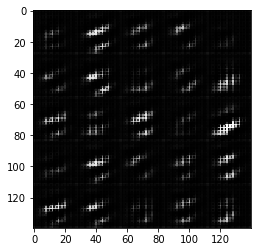

Epoch 1/2... Discriminator Loss: 0.6584... Generator Loss: 1.9967
Epoch 1/2... Discriminator Loss: 1.3145... Generator Loss: 0.7795
Epoch 1/2... Discriminator Loss: 1.1275... Generator Loss: 1.2038
Epoch 1/2... Discriminator Loss: 0.8768... Generator Loss: 1.3126
Epoch 1/2... Discriminator Loss: 0.6540... Generator Loss: 1.5385
Epoch 1/2... Discriminator Loss: 0.7376... Generator Loss: 1.4454
Epoch 1/2... Discriminator Loss: 0.7912... Generator Loss: 1.6120
Epoch 1/2... Discriminator Loss: 0.8296... Generator Loss: 1.6717
Epoch 1/2... Discriminator Loss: 0.9211... Generator Loss: 1.4421
Epoch 1/2... Discriminator Loss: 0.8395... Generator Loss: 1.3657


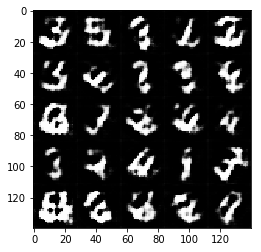

Epoch 1/2... Discriminator Loss: 0.8287... Generator Loss: 1.2188
Epoch 1/2... Discriminator Loss: 0.8867... Generator Loss: 1.3731
Epoch 1/2... Discriminator Loss: 0.9914... Generator Loss: 1.0128
Epoch 1/2... Discriminator Loss: 0.9285... Generator Loss: 1.1054
Epoch 1/2... Discriminator Loss: 1.3596... Generator Loss: 0.7502
Epoch 1/2... Discriminator Loss: 0.9391... Generator Loss: 0.9764
Epoch 1/2... Discriminator Loss: 1.0747... Generator Loss: 0.8141
Epoch 1/2... Discriminator Loss: 0.6560... Generator Loss: 1.5846
Epoch 1/2... Discriminator Loss: 0.9576... Generator Loss: 0.9825
Epoch 1/2... Discriminator Loss: 1.9231... Generator Loss: 0.2613


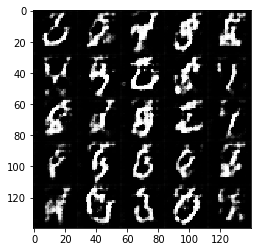

Epoch 1/2... Discriminator Loss: 1.5518... Generator Loss: 0.4556
Epoch 1/2... Discriminator Loss: 1.3326... Generator Loss: 1.2730
Epoch 1/2... Discriminator Loss: 1.4861... Generator Loss: 0.4656
Epoch 1/2... Discriminator Loss: 1.0146... Generator Loss: 1.2191
Epoch 1/2... Discriminator Loss: 0.9413... Generator Loss: 1.2013
Epoch 1/2... Discriminator Loss: 1.1494... Generator Loss: 0.8774
Epoch 1/2... Discriminator Loss: 0.9571... Generator Loss: 1.1094
Epoch 1/2... Discriminator Loss: 0.9521... Generator Loss: 0.9262
Epoch 1/2... Discriminator Loss: 1.4207... Generator Loss: 0.5480
Epoch 1/2... Discriminator Loss: 1.6660... Generator Loss: 0.3611


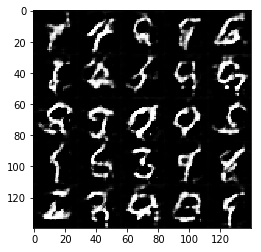

Epoch 1/2... Discriminator Loss: 1.6486... Generator Loss: 0.3565
Epoch 1/2... Discriminator Loss: 1.4751... Generator Loss: 0.4669
Epoch 1/2... Discriminator Loss: 1.5301... Generator Loss: 0.4100
Epoch 1/2... Discriminator Loss: 1.2672... Generator Loss: 0.9780
Epoch 1/2... Discriminator Loss: 1.3240... Generator Loss: 0.6978
Epoch 1/2... Discriminator Loss: 1.1277... Generator Loss: 0.8128
Epoch 1/2... Discriminator Loss: 1.2783... Generator Loss: 0.5818
Epoch 1/2... Discriminator Loss: 1.4750... Generator Loss: 0.5250
Epoch 1/2... Discriminator Loss: 1.0849... Generator Loss: 0.8536
Epoch 1/2... Discriminator Loss: 0.9257... Generator Loss: 1.2607


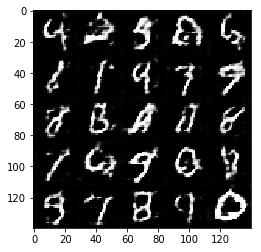

Epoch 1/2... Discriminator Loss: 1.3144... Generator Loss: 0.6826
Epoch 1/2... Discriminator Loss: 1.5052... Generator Loss: 1.1021
Epoch 1/2... Discriminator Loss: 1.0268... Generator Loss: 0.8209
Epoch 1/2... Discriminator Loss: 1.2380... Generator Loss: 1.0430
Epoch 1/2... Discriminator Loss: 1.3682... Generator Loss: 0.5323
Epoch 1/2... Discriminator Loss: 1.0699... Generator Loss: 0.7892
Epoch 1/2... Discriminator Loss: 1.7136... Generator Loss: 0.3646
Epoch 1/2... Discriminator Loss: 1.6928... Generator Loss: 0.6245
Epoch 1/2... Discriminator Loss: 1.1009... Generator Loss: 0.7561
Epoch 1/2... Discriminator Loss: 1.0730... Generator Loss: 1.4397


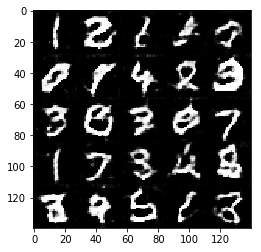

Epoch 1/2... Discriminator Loss: 1.4946... Generator Loss: 0.4420
Epoch 1/2... Discriminator Loss: 1.3489... Generator Loss: 0.6320
Epoch 1/2... Discriminator Loss: 1.4619... Generator Loss: 0.5099
Epoch 1/2... Discriminator Loss: 1.0054... Generator Loss: 1.0934
Epoch 1/2... Discriminator Loss: 1.0436... Generator Loss: 0.8159
Epoch 1/2... Discriminator Loss: 1.2110... Generator Loss: 1.3938
Epoch 1/2... Discriminator Loss: 1.2957... Generator Loss: 0.5875
Epoch 1/2... Discriminator Loss: 0.9150... Generator Loss: 1.6733
Epoch 1/2... Discriminator Loss: 1.2836... Generator Loss: 0.6749
Epoch 1/2... Discriminator Loss: 1.0532... Generator Loss: 1.0194


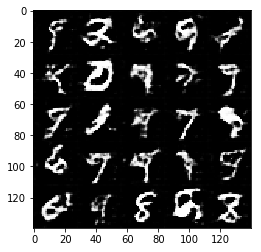

Epoch 1/2... Discriminator Loss: 1.0641... Generator Loss: 1.5182
Epoch 1/2... Discriminator Loss: 1.1536... Generator Loss: 1.7221
Epoch 1/2... Discriminator Loss: 0.9848... Generator Loss: 1.0056
Epoch 1/2... Discriminator Loss: 1.9459... Generator Loss: 0.2650
Epoch 1/2... Discriminator Loss: 1.2366... Generator Loss: 0.7211
Epoch 1/2... Discriminator Loss: 1.0622... Generator Loss: 0.8488
Epoch 1/2... Discriminator Loss: 1.0506... Generator Loss: 0.7784
Epoch 1/2... Discriminator Loss: 1.1019... Generator Loss: 2.2162
Epoch 1/2... Discriminator Loss: 1.3694... Generator Loss: 1.1314
Epoch 1/2... Discriminator Loss: 1.1395... Generator Loss: 1.3810


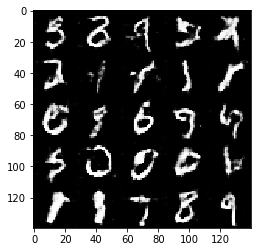

Epoch 1/2... Discriminator Loss: 0.8621... Generator Loss: 1.0090
Epoch 1/2... Discriminator Loss: 0.9064... Generator Loss: 1.0182
Epoch 1/2... Discriminator Loss: 0.9621... Generator Loss: 1.4488
Epoch 1/2... Discriminator Loss: 1.7171... Generator Loss: 0.3404
Epoch 1/2... Discriminator Loss: 1.4037... Generator Loss: 1.6298
Epoch 1/2... Discriminator Loss: 1.3973... Generator Loss: 0.4804
Epoch 1/2... Discriminator Loss: 1.5542... Generator Loss: 2.0926
Epoch 1/2... Discriminator Loss: 1.0103... Generator Loss: 0.7892
Epoch 1/2... Discriminator Loss: 0.7658... Generator Loss: 1.2324
Epoch 1/2... Discriminator Loss: 0.9128... Generator Loss: 1.2268


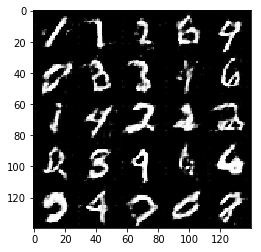

Epoch 1/2... Discriminator Loss: 1.2231... Generator Loss: 0.5980
Epoch 1/2... Discriminator Loss: 1.8098... Generator Loss: 0.3134
Epoch 1/2... Discriminator Loss: 0.9988... Generator Loss: 0.9371
Epoch 1/2... Discriminator Loss: 1.2474... Generator Loss: 0.5953
Epoch 2/2... Discriminator Loss: 1.5420... Generator Loss: 0.4391
Epoch 2/2... Discriminator Loss: 0.9548... Generator Loss: 1.4152
Epoch 2/2... Discriminator Loss: 0.8907... Generator Loss: 1.8788
Epoch 2/2... Discriminator Loss: 1.8876... Generator Loss: 0.2685
Epoch 2/2... Discriminator Loss: 1.7682... Generator Loss: 0.3042
Epoch 2/2... Discriminator Loss: 1.2295... Generator Loss: 0.6696


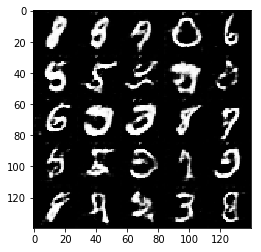

Epoch 2/2... Discriminator Loss: 0.7358... Generator Loss: 1.6538
Epoch 2/2... Discriminator Loss: 1.2557... Generator Loss: 0.7301
Epoch 2/2... Discriminator Loss: 1.1849... Generator Loss: 0.6305
Epoch 2/2... Discriminator Loss: 2.3553... Generator Loss: 0.2205
Epoch 2/2... Discriminator Loss: 2.1401... Generator Loss: 0.2045
Epoch 2/2... Discriminator Loss: 1.5257... Generator Loss: 0.4287
Epoch 2/2... Discriminator Loss: 1.2320... Generator Loss: 0.7591
Epoch 2/2... Discriminator Loss: 1.0010... Generator Loss: 0.9802
Epoch 2/2... Discriminator Loss: 1.8535... Generator Loss: 0.2915
Epoch 2/2... Discriminator Loss: 1.0068... Generator Loss: 0.8239


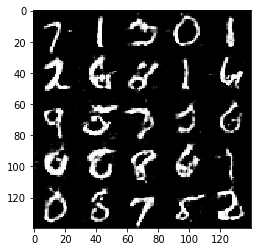

Epoch 2/2... Discriminator Loss: 1.6571... Generator Loss: 3.1430
Epoch 2/2... Discriminator Loss: 1.1315... Generator Loss: 0.7706
Epoch 2/2... Discriminator Loss: 1.5777... Generator Loss: 0.5187
Epoch 2/2... Discriminator Loss: 1.0432... Generator Loss: 1.2316
Epoch 2/2... Discriminator Loss: 1.1946... Generator Loss: 0.6428
Epoch 2/2... Discriminator Loss: 1.4226... Generator Loss: 0.5060
Epoch 2/2... Discriminator Loss: 1.1711... Generator Loss: 0.6927
Epoch 2/2... Discriminator Loss: 1.8934... Generator Loss: 0.2869
Epoch 2/2... Discriminator Loss: 1.0690... Generator Loss: 1.0985
Epoch 2/2... Discriminator Loss: 2.1917... Generator Loss: 0.2108


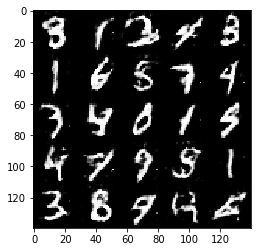

Epoch 2/2... Discriminator Loss: 1.8458... Generator Loss: 0.2904
Epoch 2/2... Discriminator Loss: 1.6551... Generator Loss: 0.3368
Epoch 2/2... Discriminator Loss: 1.1575... Generator Loss: 0.6617
Epoch 2/2... Discriminator Loss: 1.4430... Generator Loss: 0.4738
Epoch 2/2... Discriminator Loss: 1.1697... Generator Loss: 0.6577
Epoch 2/2... Discriminator Loss: 1.3386... Generator Loss: 0.5294
Epoch 2/2... Discriminator Loss: 1.4468... Generator Loss: 0.4769
Epoch 2/2... Discriminator Loss: 1.2908... Generator Loss: 0.6639
Epoch 2/2... Discriminator Loss: 1.6015... Generator Loss: 0.3743
Epoch 2/2... Discriminator Loss: 1.4985... Generator Loss: 0.4279


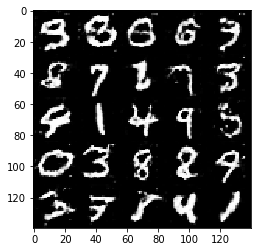

Epoch 2/2... Discriminator Loss: 2.3893... Generator Loss: 0.1640
Epoch 2/2... Discriminator Loss: 1.1515... Generator Loss: 0.8993
Epoch 2/2... Discriminator Loss: 1.2501... Generator Loss: 0.7557
Epoch 2/2... Discriminator Loss: 1.4686... Generator Loss: 0.4769
Epoch 2/2... Discriminator Loss: 2.4822... Generator Loss: 0.1568
Epoch 2/2... Discriminator Loss: 1.3027... Generator Loss: 0.5520
Epoch 2/2... Discriminator Loss: 1.7595... Generator Loss: 0.4217
Epoch 2/2... Discriminator Loss: 1.3077... Generator Loss: 0.5612
Epoch 2/2... Discriminator Loss: 1.3175... Generator Loss: 0.5252
Epoch 2/2... Discriminator Loss: 2.1984... Generator Loss: 0.2017


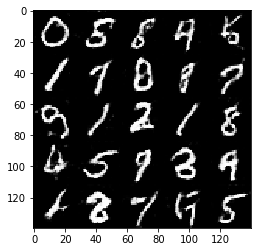

Epoch 2/2... Discriminator Loss: 1.7641... Generator Loss: 0.3037
Epoch 2/2... Discriminator Loss: 1.1189... Generator Loss: 0.7359
Epoch 2/2... Discriminator Loss: 1.0999... Generator Loss: 0.8568
Epoch 2/2... Discriminator Loss: 1.2143... Generator Loss: 0.6986
Epoch 2/2... Discriminator Loss: 1.2721... Generator Loss: 0.8325
Epoch 2/2... Discriminator Loss: 1.7279... Generator Loss: 0.3812
Epoch 2/2... Discriminator Loss: 1.8404... Generator Loss: 0.3058
Epoch 2/2... Discriminator Loss: 1.2169... Generator Loss: 0.7178
Epoch 2/2... Discriminator Loss: 1.3296... Generator Loss: 0.6013
Epoch 2/2... Discriminator Loss: 1.8443... Generator Loss: 0.3092


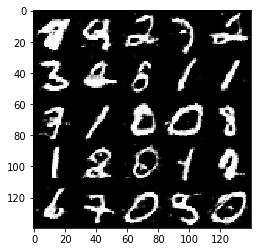

Epoch 2/2... Discriminator Loss: 0.9278... Generator Loss: 1.2352
Epoch 2/2... Discriminator Loss: 0.9203... Generator Loss: 1.4482
Epoch 2/2... Discriminator Loss: 0.9686... Generator Loss: 0.9898
Epoch 2/2... Discriminator Loss: 1.1185... Generator Loss: 1.3596
Epoch 2/2... Discriminator Loss: 2.0328... Generator Loss: 0.2355
Epoch 2/2... Discriminator Loss: 1.2350... Generator Loss: 0.7961
Epoch 2/2... Discriminator Loss: 1.4895... Generator Loss: 0.4348
Epoch 2/2... Discriminator Loss: 2.1083... Generator Loss: 0.2168
Epoch 2/2... Discriminator Loss: 0.7013... Generator Loss: 1.5913
Epoch 2/2... Discriminator Loss: 1.3310... Generator Loss: 0.5093


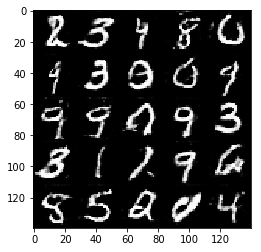

Epoch 2/2... Discriminator Loss: 1.3197... Generator Loss: 0.8772
Epoch 2/2... Discriminator Loss: 1.0578... Generator Loss: 0.8736
Epoch 2/2... Discriminator Loss: 1.0045... Generator Loss: 0.9409
Epoch 2/2... Discriminator Loss: 1.1996... Generator Loss: 1.3159
Epoch 2/2... Discriminator Loss: 1.1881... Generator Loss: 0.6309
Epoch 2/2... Discriminator Loss: 1.0347... Generator Loss: 0.7634
Epoch 2/2... Discriminator Loss: 1.6997... Generator Loss: 0.4090
Epoch 2/2... Discriminator Loss: 1.5318... Generator Loss: 0.4202
Epoch 2/2... Discriminator Loss: 1.1930... Generator Loss: 1.0005
Epoch 2/2... Discriminator Loss: 1.1412... Generator Loss: 1.0401


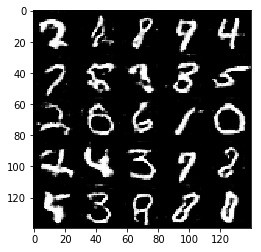

Epoch 2/2... Discriminator Loss: 1.8578... Generator Loss: 0.2734
Epoch 2/2... Discriminator Loss: 1.1594... Generator Loss: 0.6504
Epoch 2/2... Discriminator Loss: 1.2737... Generator Loss: 0.6689
Epoch 2/2... Discriminator Loss: 1.2972... Generator Loss: 0.5699
Epoch 2/2... Discriminator Loss: 1.0202... Generator Loss: 0.9172
Epoch 2/2... Discriminator Loss: 2.2732... Generator Loss: 0.1746
Epoch 2/2... Discriminator Loss: 1.7870... Generator Loss: 3.4195
Epoch 2/2... Discriminator Loss: 1.2874... Generator Loss: 0.6799
Epoch 2/2... Discriminator Loss: 1.2188... Generator Loss: 2.2705
Epoch 2/2... Discriminator Loss: 1.4019... Generator Loss: 0.6351


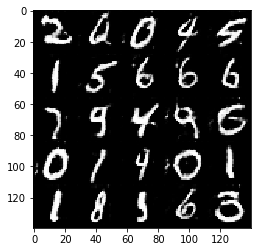

Epoch 2/2... Discriminator Loss: 1.5744... Generator Loss: 0.4091
Epoch 2/2... Discriminator Loss: 2.1278... Generator Loss: 0.2001
Epoch 2/2... Discriminator Loss: 2.5032... Generator Loss: 0.1378
Epoch 2/2... Discriminator Loss: 1.5656... Generator Loss: 1.2928
Epoch 2/2... Discriminator Loss: 1.0889... Generator Loss: 0.7933
Epoch 2/2... Discriminator Loss: 0.8368... Generator Loss: 1.4746
Epoch 2/2... Discriminator Loss: 1.0790... Generator Loss: 0.8684
Epoch 2/2... Discriminator Loss: 1.0512... Generator Loss: 0.9772


In [54]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.8308... Generator Loss: 2.0265
Epoch 1/1... Discriminator Loss: 1.1025... Generator Loss: 1.8695
Epoch 1/1... Discriminator Loss: 1.1980... Generator Loss: 1.1336
Epoch 1/1... Discriminator Loss: 0.7705... Generator Loss: 2.7928
Epoch 1/1... Discriminator Loss: 0.9323... Generator Loss: 1.5631
Epoch 1/1... Discriminator Loss: 1.3066... Generator Loss: 1.0221
Epoch 1/1... Discriminator Loss: 1.1667... Generator Loss: 0.9292
Epoch 1/1... Discriminator Loss: 0.5762... Generator Loss: 1.8191
Epoch 1/1... Discriminator Loss: 1.0992... Generator Loss: 1.3458


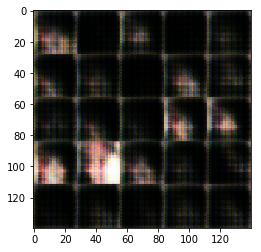

Epoch 1/1... Discriminator Loss: 0.7447... Generator Loss: 1.8572
Epoch 1/1... Discriminator Loss: 1.4009... Generator Loss: 2.2915
Epoch 1/1... Discriminator Loss: 1.1206... Generator Loss: 1.1952
Epoch 1/1... Discriminator Loss: 0.7951... Generator Loss: 1.9443
Epoch 1/1... Discriminator Loss: 1.2710... Generator Loss: 1.3093
Epoch 1/1... Discriminator Loss: 1.3132... Generator Loss: 0.9463
Epoch 1/1... Discriminator Loss: 1.1159... Generator Loss: 0.9555
Epoch 1/1... Discriminator Loss: 1.1164... Generator Loss: 0.7858
Epoch 1/1... Discriminator Loss: 0.9208... Generator Loss: 1.1210
Epoch 1/1... Discriminator Loss: 0.8714... Generator Loss: 1.1781


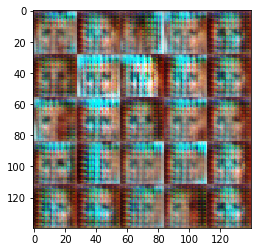

Epoch 1/1... Discriminator Loss: 1.4410... Generator Loss: 0.7461
Epoch 1/1... Discriminator Loss: 1.2681... Generator Loss: 0.7796
Epoch 1/1... Discriminator Loss: 1.1761... Generator Loss: 1.2348
Epoch 1/1... Discriminator Loss: 1.4670... Generator Loss: 0.7049
Epoch 1/1... Discriminator Loss: 1.3568... Generator Loss: 0.5648
Epoch 1/1... Discriminator Loss: 1.1963... Generator Loss: 0.8361
Epoch 1/1... Discriminator Loss: 1.3181... Generator Loss: 0.8922
Epoch 1/1... Discriminator Loss: 1.0983... Generator Loss: 1.1262
Epoch 1/1... Discriminator Loss: 1.0933... Generator Loss: 1.0496
Epoch 1/1... Discriminator Loss: 1.3062... Generator Loss: 0.8231


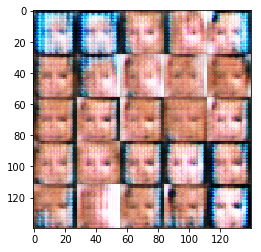

Epoch 1/1... Discriminator Loss: 1.2299... Generator Loss: 0.7049
Epoch 1/1... Discriminator Loss: 1.0033... Generator Loss: 1.0788
Epoch 1/1... Discriminator Loss: 1.0042... Generator Loss: 1.3326
Epoch 1/1... Discriminator Loss: 1.1239... Generator Loss: 1.0390
Epoch 1/1... Discriminator Loss: 1.9268... Generator Loss: 0.2735
Epoch 1/1... Discriminator Loss: 1.0618... Generator Loss: 0.8753
Epoch 1/1... Discriminator Loss: 0.9736... Generator Loss: 1.0383
Epoch 1/1... Discriminator Loss: 1.1485... Generator Loss: 1.2304
Epoch 1/1... Discriminator Loss: 0.8381... Generator Loss: 1.4257
Epoch 1/1... Discriminator Loss: 1.8630... Generator Loss: 0.2938


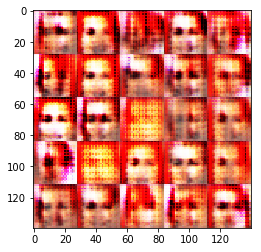

Epoch 1/1... Discriminator Loss: 1.5382... Generator Loss: 3.6015
Epoch 1/1... Discriminator Loss: 0.6810... Generator Loss: 1.6972
Epoch 1/1... Discriminator Loss: 1.8719... Generator Loss: 2.1238
Epoch 1/1... Discriminator Loss: 1.3219... Generator Loss: 0.7712
Epoch 1/1... Discriminator Loss: 1.1284... Generator Loss: 1.5684
Epoch 1/1... Discriminator Loss: 1.7130... Generator Loss: 2.9538
Epoch 1/1... Discriminator Loss: 1.6812... Generator Loss: 2.7934
Epoch 1/1... Discriminator Loss: 1.1856... Generator Loss: 1.1572
Epoch 1/1... Discriminator Loss: 1.0092... Generator Loss: 1.0020
Epoch 1/1... Discriminator Loss: 0.9370... Generator Loss: 0.9257


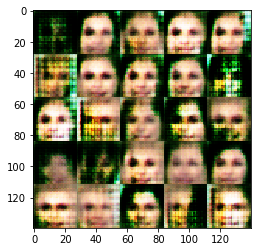

Epoch 1/1... Discriminator Loss: 1.4710... Generator Loss: 0.5155
Epoch 1/1... Discriminator Loss: 1.2376... Generator Loss: 0.6765
Epoch 1/1... Discriminator Loss: 1.0406... Generator Loss: 1.0090
Epoch 1/1... Discriminator Loss: 0.8370... Generator Loss: 0.9845
Epoch 1/1... Discriminator Loss: 1.0020... Generator Loss: 0.8795
Epoch 1/1... Discriminator Loss: 0.8786... Generator Loss: 1.0537
Epoch 1/1... Discriminator Loss: 1.3249... Generator Loss: 0.6429
Epoch 1/1... Discriminator Loss: 1.0371... Generator Loss: 1.2046
Epoch 1/1... Discriminator Loss: 1.2573... Generator Loss: 0.5808
Epoch 1/1... Discriminator Loss: 0.9503... Generator Loss: 0.9720


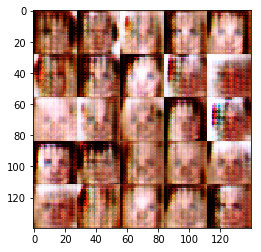

Epoch 1/1... Discriminator Loss: 1.1287... Generator Loss: 0.7713
Epoch 1/1... Discriminator Loss: 1.1358... Generator Loss: 0.7776
Epoch 1/1... Discriminator Loss: 1.0840... Generator Loss: 1.0756
Epoch 1/1... Discriminator Loss: 0.8020... Generator Loss: 1.3204
Epoch 1/1... Discriminator Loss: 1.0833... Generator Loss: 1.3795
Epoch 1/1... Discriminator Loss: 1.3221... Generator Loss: 0.7686
Epoch 1/1... Discriminator Loss: 1.5905... Generator Loss: 0.5436
Epoch 1/1... Discriminator Loss: 2.1142... Generator Loss: 0.2338
Epoch 1/1... Discriminator Loss: 1.0761... Generator Loss: 1.6555
Epoch 1/1... Discriminator Loss: 1.0222... Generator Loss: 1.4728


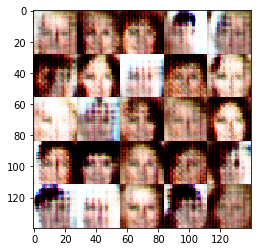

Epoch 1/1... Discriminator Loss: 1.1558... Generator Loss: 0.6804
Epoch 1/1... Discriminator Loss: 0.9713... Generator Loss: 1.0672
Epoch 1/1... Discriminator Loss: 1.1918... Generator Loss: 0.9501
Epoch 1/1... Discriminator Loss: 0.9394... Generator Loss: 0.8440
Epoch 1/1... Discriminator Loss: 0.9747... Generator Loss: 1.1090
Epoch 1/1... Discriminator Loss: 1.0803... Generator Loss: 1.6983
Epoch 1/1... Discriminator Loss: 0.7743... Generator Loss: 1.7884
Epoch 1/1... Discriminator Loss: 1.1823... Generator Loss: 0.8485
Epoch 1/1... Discriminator Loss: 1.3312... Generator Loss: 1.1881
Epoch 1/1... Discriminator Loss: 0.9402... Generator Loss: 1.2704


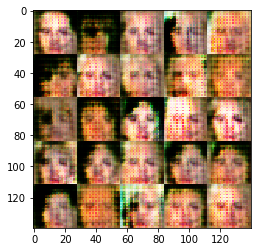

Epoch 1/1... Discriminator Loss: 0.7403... Generator Loss: 1.4676
Epoch 1/1... Discriminator Loss: 1.5375... Generator Loss: 0.3915
Epoch 1/1... Discriminator Loss: 1.0799... Generator Loss: 1.0074
Epoch 1/1... Discriminator Loss: 1.5289... Generator Loss: 0.4160
Epoch 1/1... Discriminator Loss: 0.7949... Generator Loss: 1.2071
Epoch 1/1... Discriminator Loss: 1.0334... Generator Loss: 1.9320
Epoch 1/1... Discriminator Loss: 0.8098... Generator Loss: 1.5830
Epoch 1/1... Discriminator Loss: 1.2274... Generator Loss: 0.8130
Epoch 1/1... Discriminator Loss: 1.8668... Generator Loss: 2.6776
Epoch 1/1... Discriminator Loss: 1.0972... Generator Loss: 0.8514


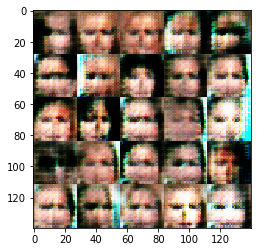

Epoch 1/1... Discriminator Loss: 1.0911... Generator Loss: 0.7312
Epoch 1/1... Discriminator Loss: 1.0244... Generator Loss: 0.7955
Epoch 1/1... Discriminator Loss: 1.0250... Generator Loss: 1.2128
Epoch 1/1... Discriminator Loss: 1.0548... Generator Loss: 0.8975
Epoch 1/1... Discriminator Loss: 1.2959... Generator Loss: 0.5757
Epoch 1/1... Discriminator Loss: 1.5765... Generator Loss: 3.6676
Epoch 1/1... Discriminator Loss: 1.4260... Generator Loss: 0.5620
Epoch 1/1... Discriminator Loss: 0.9751... Generator Loss: 1.0772
Epoch 1/1... Discriminator Loss: 1.3226... Generator Loss: 0.6276
Epoch 1/1... Discriminator Loss: 1.4797... Generator Loss: 0.7442


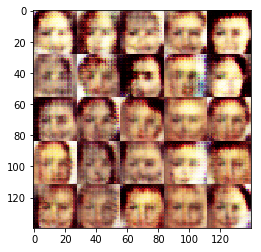

Epoch 1/1... Discriminator Loss: 0.8659... Generator Loss: 2.0438
Epoch 1/1... Discriminator Loss: 1.2091... Generator Loss: 0.7237
Epoch 1/1... Discriminator Loss: 0.8305... Generator Loss: 1.4516
Epoch 1/1... Discriminator Loss: 0.6644... Generator Loss: 1.4264
Epoch 1/1... Discriminator Loss: 0.9553... Generator Loss: 1.2080
Epoch 1/1... Discriminator Loss: 0.8960... Generator Loss: 1.2353
Epoch 1/1... Discriminator Loss: 1.0041... Generator Loss: 1.1319
Epoch 1/1... Discriminator Loss: 0.9400... Generator Loss: 1.5793
Epoch 1/1... Discriminator Loss: 1.0665... Generator Loss: 1.6929
Epoch 1/1... Discriminator Loss: 1.1338... Generator Loss: 1.3097


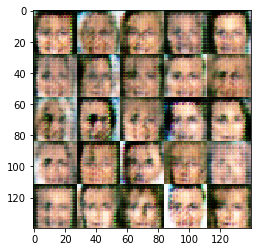

Epoch 1/1... Discriminator Loss: 1.1417... Generator Loss: 0.6527
Epoch 1/1... Discriminator Loss: 1.1260... Generator Loss: 0.8269
Epoch 1/1... Discriminator Loss: 0.7752... Generator Loss: 1.6222
Epoch 1/1... Discriminator Loss: 1.2551... Generator Loss: 0.9156
Epoch 1/1... Discriminator Loss: 1.3482... Generator Loss: 0.7125
Epoch 1/1... Discriminator Loss: 1.2655... Generator Loss: 0.6466
Epoch 1/1... Discriminator Loss: 0.8544... Generator Loss: 1.1439
Epoch 1/1... Discriminator Loss: 1.3070... Generator Loss: 0.6045
Epoch 1/1... Discriminator Loss: 1.0597... Generator Loss: 2.1414
Epoch 1/1... Discriminator Loss: 1.6246... Generator Loss: 0.4140


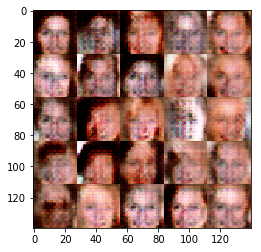

Epoch 1/1... Discriminator Loss: 0.9612... Generator Loss: 1.7778
Epoch 1/1... Discriminator Loss: 1.8559... Generator Loss: 0.3009
Epoch 1/1... Discriminator Loss: 1.1980... Generator Loss: 0.6680
Epoch 1/1... Discriminator Loss: 1.0302... Generator Loss: 0.8817
Epoch 1/1... Discriminator Loss: 1.0484... Generator Loss: 1.4573
Epoch 1/1... Discriminator Loss: 1.0927... Generator Loss: 1.0314
Epoch 1/1... Discriminator Loss: 1.7011... Generator Loss: 0.3407
Epoch 1/1... Discriminator Loss: 0.9724... Generator Loss: 1.4393
Epoch 1/1... Discriminator Loss: 0.7800... Generator Loss: 1.5114
Epoch 1/1... Discriminator Loss: 1.1831... Generator Loss: 0.6982


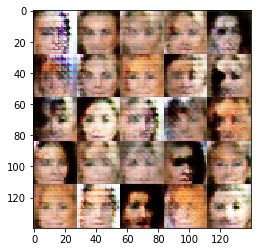

Epoch 1/1... Discriminator Loss: 1.5286... Generator Loss: 0.4261
Epoch 1/1... Discriminator Loss: 1.1568... Generator Loss: 0.6919
Epoch 1/1... Discriminator Loss: 1.1254... Generator Loss: 0.8062
Epoch 1/1... Discriminator Loss: 0.9565... Generator Loss: 1.8388
Epoch 1/1... Discriminator Loss: 0.8495... Generator Loss: 1.6691
Epoch 1/1... Discriminator Loss: 0.8594... Generator Loss: 1.3657
Epoch 1/1... Discriminator Loss: 0.8798... Generator Loss: 1.4229
Epoch 1/1... Discriminator Loss: 1.3250... Generator Loss: 0.5403
Epoch 1/1... Discriminator Loss: 1.2527... Generator Loss: 0.5585
Epoch 1/1... Discriminator Loss: 0.9989... Generator Loss: 0.8077


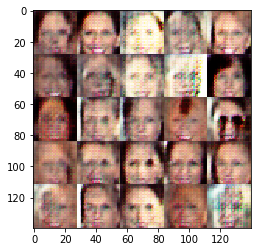

Epoch 1/1... Discriminator Loss: 0.9566... Generator Loss: 1.4560
Epoch 1/1... Discriminator Loss: 0.9294... Generator Loss: 1.4110
Epoch 1/1... Discriminator Loss: 0.8264... Generator Loss: 1.1955
Epoch 1/1... Discriminator Loss: 1.1843... Generator Loss: 0.6832
Epoch 1/1... Discriminator Loss: 1.3053... Generator Loss: 3.0777
Epoch 1/1... Discriminator Loss: 1.1344... Generator Loss: 0.7319
Epoch 1/1... Discriminator Loss: 0.7797... Generator Loss: 1.5567
Epoch 1/1... Discriminator Loss: 1.8944... Generator Loss: 3.9234
Epoch 1/1... Discriminator Loss: 0.8746... Generator Loss: 1.2370
Epoch 1/1... Discriminator Loss: 0.9930... Generator Loss: 0.9159


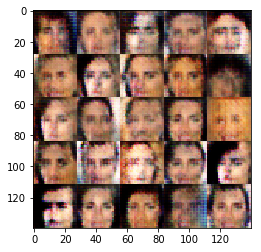

Epoch 1/1... Discriminator Loss: 1.0008... Generator Loss: 1.2010
Epoch 1/1... Discriminator Loss: 0.8581... Generator Loss: 1.2840
Epoch 1/1... Discriminator Loss: 1.0041... Generator Loss: 0.8651
Epoch 1/1... Discriminator Loss: 1.0212... Generator Loss: 1.3937
Epoch 1/1... Discriminator Loss: 0.8016... Generator Loss: 1.1815
Epoch 1/1... Discriminator Loss: 0.9240... Generator Loss: 1.4500
Epoch 1/1... Discriminator Loss: 1.1444... Generator Loss: 0.7548
Epoch 1/1... Discriminator Loss: 1.0199... Generator Loss: 1.0721
Epoch 1/1... Discriminator Loss: 0.9615... Generator Loss: 1.5220
Epoch 1/1... Discriminator Loss: 0.9237... Generator Loss: 1.1343


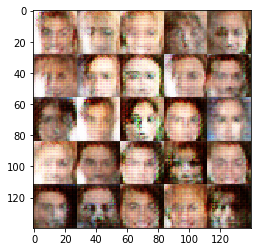

Epoch 1/1... Discriminator Loss: 0.9377... Generator Loss: 0.9573
Epoch 1/1... Discriminator Loss: 1.8639... Generator Loss: 0.3175
Epoch 1/1... Discriminator Loss: 0.7796... Generator Loss: 1.6978
Epoch 1/1... Discriminator Loss: 0.8765... Generator Loss: 1.3274
Epoch 1/1... Discriminator Loss: 0.7556... Generator Loss: 2.3815
Epoch 1/1... Discriminator Loss: 0.8289... Generator Loss: 1.3861
Epoch 1/1... Discriminator Loss: 1.1621... Generator Loss: 1.0237
Epoch 1/1... Discriminator Loss: 0.9633... Generator Loss: 1.4658
Epoch 1/1... Discriminator Loss: 1.0870... Generator Loss: 0.9486
Epoch 1/1... Discriminator Loss: 1.1885... Generator Loss: 1.4551


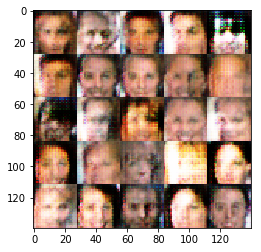

Epoch 1/1... Discriminator Loss: 1.2681... Generator Loss: 2.2490
Epoch 1/1... Discriminator Loss: 1.0291... Generator Loss: 1.8641
Epoch 1/1... Discriminator Loss: 1.6388... Generator Loss: 0.3885
Epoch 1/1... Discriminator Loss: 1.0648... Generator Loss: 0.9926
Epoch 1/1... Discriminator Loss: 0.9837... Generator Loss: 0.8862
Epoch 1/1... Discriminator Loss: 0.8380... Generator Loss: 1.4356
Epoch 1/1... Discriminator Loss: 1.9591... Generator Loss: 0.2881
Epoch 1/1... Discriminator Loss: 1.3019... Generator Loss: 0.6646
Epoch 1/1... Discriminator Loss: 1.0640... Generator Loss: 1.5992
Epoch 1/1... Discriminator Loss: 1.1888... Generator Loss: 0.7418


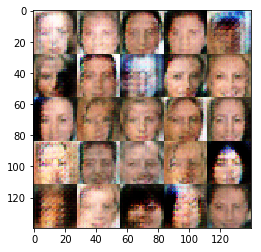

Epoch 1/1... Discriminator Loss: 1.0224... Generator Loss: 1.2751
Epoch 1/1... Discriminator Loss: 0.9803... Generator Loss: 0.9261
Epoch 1/1... Discriminator Loss: 1.2599... Generator Loss: 2.3685
Epoch 1/1... Discriminator Loss: 1.0259... Generator Loss: 1.4714
Epoch 1/1... Discriminator Loss: 0.9926... Generator Loss: 2.0178
Epoch 1/1... Discriminator Loss: 0.8503... Generator Loss: 1.5071
Epoch 1/1... Discriminator Loss: 0.7743... Generator Loss: 1.4833
Epoch 1/1... Discriminator Loss: 1.7611... Generator Loss: 0.3223
Epoch 1/1... Discriminator Loss: 1.0503... Generator Loss: 0.9460
Epoch 1/1... Discriminator Loss: 0.9554... Generator Loss: 1.5308


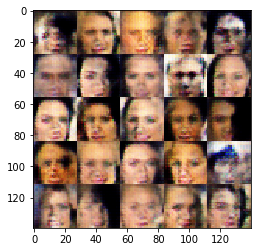

Epoch 1/1... Discriminator Loss: 1.1238... Generator Loss: 2.6070
Epoch 1/1... Discriminator Loss: 1.0641... Generator Loss: 1.2026
Epoch 1/1... Discriminator Loss: 0.8834... Generator Loss: 1.1961
Epoch 1/1... Discriminator Loss: 1.0482... Generator Loss: 1.2582
Epoch 1/1... Discriminator Loss: 0.9786... Generator Loss: 1.1740
Epoch 1/1... Discriminator Loss: 0.7868... Generator Loss: 1.2710
Epoch 1/1... Discriminator Loss: 1.0363... Generator Loss: 0.8648
Epoch 1/1... Discriminator Loss: 1.0824... Generator Loss: 1.9642
Epoch 1/1... Discriminator Loss: 1.1248... Generator Loss: 0.7382
Epoch 1/1... Discriminator Loss: 1.1158... Generator Loss: 1.2854


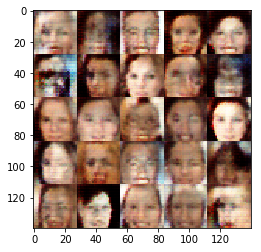

Epoch 1/1... Discriminator Loss: 0.8284... Generator Loss: 1.5206
Epoch 1/1... Discriminator Loss: 1.0757... Generator Loss: 0.7950
Epoch 1/1... Discriminator Loss: 1.1194... Generator Loss: 0.7879
Epoch 1/1... Discriminator Loss: 0.9068... Generator Loss: 1.8710
Epoch 1/1... Discriminator Loss: 1.0194... Generator Loss: 1.3487
Epoch 1/1... Discriminator Loss: 1.1019... Generator Loss: 0.8177
Epoch 1/1... Discriminator Loss: 1.0111... Generator Loss: 0.9472
Epoch 1/1... Discriminator Loss: 0.9744... Generator Loss: 0.9968
Epoch 1/1... Discriminator Loss: 0.8701... Generator Loss: 1.2899
Epoch 1/1... Discriminator Loss: 1.5180... Generator Loss: 0.4357


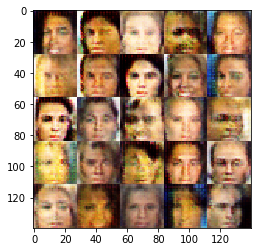

Epoch 1/1... Discriminator Loss: 0.8773... Generator Loss: 1.9558
Epoch 1/1... Discriminator Loss: 1.0577... Generator Loss: 0.9467
Epoch 1/1... Discriminator Loss: 1.1366... Generator Loss: 0.8187
Epoch 1/1... Discriminator Loss: 1.6078... Generator Loss: 0.3852
Epoch 1/1... Discriminator Loss: 1.2436... Generator Loss: 0.6380
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 0.5821
Epoch 1/1... Discriminator Loss: 1.1779... Generator Loss: 0.8772
Epoch 1/1... Discriminator Loss: 0.8011... Generator Loss: 1.3481
Epoch 1/1... Discriminator Loss: 1.0394... Generator Loss: 0.9675
Epoch 1/1... Discriminator Loss: 1.1607... Generator Loss: 0.6770


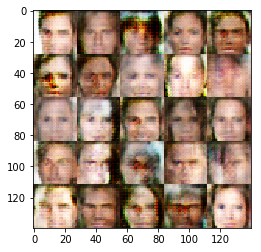

Epoch 1/1... Discriminator Loss: 1.4728... Generator Loss: 2.4629
Epoch 1/1... Discriminator Loss: 0.9133... Generator Loss: 0.9817
Epoch 1/1... Discriminator Loss: 1.1181... Generator Loss: 1.0617
Epoch 1/1... Discriminator Loss: 1.0045... Generator Loss: 1.3480
Epoch 1/1... Discriminator Loss: 1.3354... Generator Loss: 0.5696
Epoch 1/1... Discriminator Loss: 1.2389... Generator Loss: 0.6363
Epoch 1/1... Discriminator Loss: 1.1631... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.3731... Generator Loss: 0.5356
Epoch 1/1... Discriminator Loss: 1.7179... Generator Loss: 0.3455
Epoch 1/1... Discriminator Loss: 0.9878... Generator Loss: 0.9217


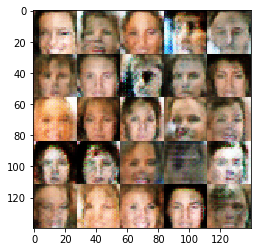

Epoch 1/1... Discriminator Loss: 1.2168... Generator Loss: 0.8673
Epoch 1/1... Discriminator Loss: 1.0679... Generator Loss: 1.2703
Epoch 1/1... Discriminator Loss: 0.9553... Generator Loss: 1.1804
Epoch 1/1... Discriminator Loss: 0.9488... Generator Loss: 1.1912
Epoch 1/1... Discriminator Loss: 1.0540... Generator Loss: 0.8235
Epoch 1/1... Discriminator Loss: 1.3274... Generator Loss: 0.5733
Epoch 1/1... Discriminator Loss: 1.0240... Generator Loss: 0.8946
Epoch 1/1... Discriminator Loss: 1.0652... Generator Loss: 1.0176
Epoch 1/1... Discriminator Loss: 0.9411... Generator Loss: 1.1353
Epoch 1/1... Discriminator Loss: 1.3937... Generator Loss: 2.0225


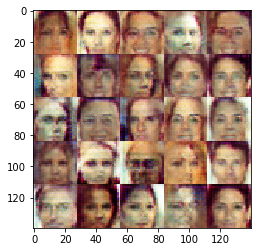

Epoch 1/1... Discriminator Loss: 0.9200... Generator Loss: 1.0286
Epoch 1/1... Discriminator Loss: 1.3175... Generator Loss: 2.5475
Epoch 1/1... Discriminator Loss: 0.9922... Generator Loss: 1.9197
Epoch 1/1... Discriminator Loss: 1.1349... Generator Loss: 0.7291
Epoch 1/1... Discriminator Loss: 0.9531... Generator Loss: 1.2923
Epoch 1/1... Discriminator Loss: 1.2413... Generator Loss: 0.5930
Epoch 1/1... Discriminator Loss: 1.6361... Generator Loss: 0.4140
Epoch 1/1... Discriminator Loss: 1.7304... Generator Loss: 0.3703
Epoch 1/1... Discriminator Loss: 0.9794... Generator Loss: 1.1221
Epoch 1/1... Discriminator Loss: 1.0728... Generator Loss: 0.8326


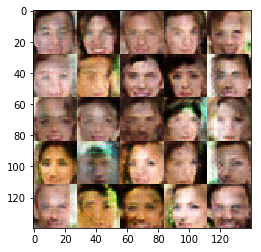

Epoch 1/1... Discriminator Loss: 1.0687... Generator Loss: 1.4068
Epoch 1/1... Discriminator Loss: 0.8363... Generator Loss: 1.2338
Epoch 1/1... Discriminator Loss: 1.2166... Generator Loss: 1.7598
Epoch 1/1... Discriminator Loss: 0.8978... Generator Loss: 1.1958
Epoch 1/1... Discriminator Loss: 0.8114... Generator Loss: 1.3244
Epoch 1/1... Discriminator Loss: 0.9569... Generator Loss: 1.0542
Epoch 1/1... Discriminator Loss: 1.3192... Generator Loss: 0.6235
Epoch 1/1... Discriminator Loss: 1.0002... Generator Loss: 1.0401
Epoch 1/1... Discriminator Loss: 0.9020... Generator Loss: 1.9473
Epoch 1/1... Discriminator Loss: 1.4790... Generator Loss: 0.4905


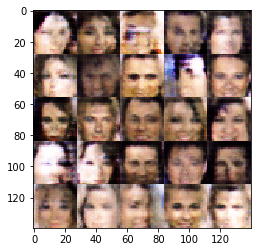

Epoch 1/1... Discriminator Loss: 1.2105... Generator Loss: 3.0721
Epoch 1/1... Discriminator Loss: 1.0769... Generator Loss: 1.8399
Epoch 1/1... Discriminator Loss: 1.0440... Generator Loss: 0.8573
Epoch 1/1... Discriminator Loss: 0.9869... Generator Loss: 1.1059
Epoch 1/1... Discriminator Loss: 1.1070... Generator Loss: 0.7605
Epoch 1/1... Discriminator Loss: 0.9955... Generator Loss: 0.9120
Epoch 1/1... Discriminator Loss: 0.9182... Generator Loss: 1.1309
Epoch 1/1... Discriminator Loss: 1.5559... Generator Loss: 0.4365
Epoch 1/1... Discriminator Loss: 1.7211... Generator Loss: 0.3709
Epoch 1/1... Discriminator Loss: 0.9301... Generator Loss: 0.9723


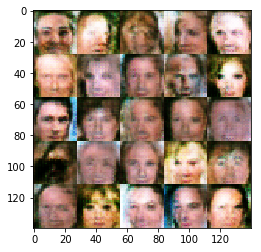

Epoch 1/1... Discriminator Loss: 1.0931... Generator Loss: 1.0070
Epoch 1/1... Discriminator Loss: 1.1104... Generator Loss: 0.7943
Epoch 1/1... Discriminator Loss: 1.1155... Generator Loss: 0.9896
Epoch 1/1... Discriminator Loss: 1.1430... Generator Loss: 0.8327
Epoch 1/1... Discriminator Loss: 1.2349... Generator Loss: 0.6312
Epoch 1/1... Discriminator Loss: 0.9841... Generator Loss: 1.0452
Epoch 1/1... Discriminator Loss: 1.0996... Generator Loss: 0.9444
Epoch 1/1... Discriminator Loss: 1.1225... Generator Loss: 0.7437
Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 2.5370
Epoch 1/1... Discriminator Loss: 1.0767... Generator Loss: 0.8273


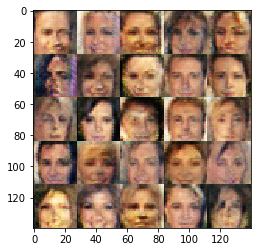

Epoch 1/1... Discriminator Loss: 0.9379... Generator Loss: 1.6236
Epoch 1/1... Discriminator Loss: 1.0441... Generator Loss: 0.9083
Epoch 1/1... Discriminator Loss: 1.1915... Generator Loss: 1.9316
Epoch 1/1... Discriminator Loss: 1.2631... Generator Loss: 0.5988
Epoch 1/1... Discriminator Loss: 0.7857... Generator Loss: 2.2198
Epoch 1/1... Discriminator Loss: 0.7975... Generator Loss: 2.3614
Epoch 1/1... Discriminator Loss: 1.2247... Generator Loss: 0.6494
Epoch 1/1... Discriminator Loss: 1.0243... Generator Loss: 0.9604
Epoch 1/1... Discriminator Loss: 1.2510... Generator Loss: 0.6097
Epoch 1/1... Discriminator Loss: 1.0100... Generator Loss: 0.8590


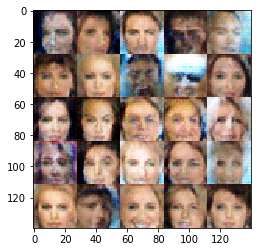

Epoch 1/1... Discriminator Loss: 0.9665... Generator Loss: 1.0171
Epoch 1/1... Discriminator Loss: 1.2219... Generator Loss: 0.9224
Epoch 1/1... Discriminator Loss: 1.2613... Generator Loss: 0.6215
Epoch 1/1... Discriminator Loss: 1.2326... Generator Loss: 0.6758
Epoch 1/1... Discriminator Loss: 0.9423... Generator Loss: 1.0305
Epoch 1/1... Discriminator Loss: 1.3518... Generator Loss: 0.5165
Epoch 1/1... Discriminator Loss: 0.9288... Generator Loss: 1.4036
Epoch 1/1... Discriminator Loss: 1.2933... Generator Loss: 0.5972
Epoch 1/1... Discriminator Loss: 1.3707... Generator Loss: 0.5248
Epoch 1/1... Discriminator Loss: 0.9831... Generator Loss: 1.1123


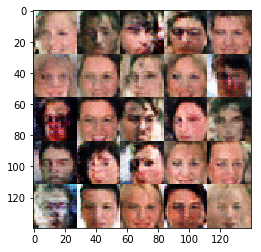

Epoch 1/1... Discriminator Loss: 1.0226... Generator Loss: 1.3453
Epoch 1/1... Discriminator Loss: 1.1935... Generator Loss: 0.7156
Epoch 1/1... Discriminator Loss: 1.2020... Generator Loss: 0.6679
Epoch 1/1... Discriminator Loss: 0.7478... Generator Loss: 1.5773
Epoch 1/1... Discriminator Loss: 1.0420... Generator Loss: 0.7945
Epoch 1/1... Discriminator Loss: 0.8448... Generator Loss: 1.2432
Epoch 1/1... Discriminator Loss: 1.2095... Generator Loss: 0.8359
Epoch 1/1... Discriminator Loss: 0.8826... Generator Loss: 1.7159
Epoch 1/1... Discriminator Loss: 1.0336... Generator Loss: 1.3927
Epoch 1/1... Discriminator Loss: 1.3360... Generator Loss: 0.5309


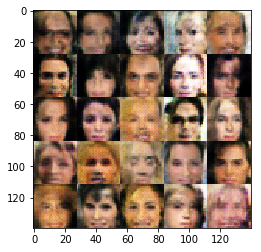

Epoch 1/1... Discriminator Loss: 0.9794... Generator Loss: 0.9961
Epoch 1/1... Discriminator Loss: 0.9572... Generator Loss: 0.9596
Epoch 1/1... Discriminator Loss: 1.0218... Generator Loss: 1.1055
Epoch 1/1... Discriminator Loss: 1.1784... Generator Loss: 0.7981
Epoch 1/1... Discriminator Loss: 1.0496... Generator Loss: 0.9246
Epoch 1/1... Discriminator Loss: 1.1105... Generator Loss: 0.8147
Epoch 1/1... Discriminator Loss: 1.5724... Generator Loss: 0.4130


In [55]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.